<a href="https://colab.research.google.com/github/SanjayShetty01/Quantium_Data_Science_Virtual_Internship/blob/main/QVI_Data_Science_(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import all the Libraries

In [ ]:
install.packages('readxl')
install.packages('ggmosaic')
install.packages("tm")
install.packages("gtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(warn = -1)
options(repr.plot.width = 10, repr.plot.height = 10)

### Load the Library

In [ ]:
library(plyr)
library(ggplot2)
library(tidyr)
library(readr)
library(ggmosaic)
library(readxl)
library(data.table)
library(tm)
library(stringr)
library(gtools)


### Load the datasets

In [ ]:
Purchase <- read.csv('https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv')

url <- 'https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx'
lcl <- basename(url)
download.file(url = url, destfile = lcl)

Transactional <- read_excel(lcl)

### Preparing data for analysis

In [ ]:
Transactional_df <- as.data.frame(Transactional)

Transactional_df$DATE <- as.Date(Transactional_df$DATE, origin = '1900-01-01')

Transactional_df <- dplyr::filter(Transactional_df, grepl('Chips', PROD_NAME))

Transactional_df$Pack_Size <- stringr::str_extract_all(Transactional_df$PROD_NAME, "\\d+\\.*\\d*")

Transactional_df$Pack_Size <- as.numeric(Transactional_df$Pack_Size)

Transactional_df <- Transactional_df %>%
  separate(PROD_NAME, into = "BRAND_NAME") 

Transactional_df$BRAND_NAME<- sub(".*Dorito.*", "Doritos", Transactional_df$BRAND_NAME)
Transactional_df$BRAND_NAME<- sub(".*Infzns.*", "Infuzions", Transactional_df$BRAND_NAME)
Transactional_df$BRAND_NAME<- sub(".*RRD.*", "Red", Transactional_df$BRAND_NAME)
Transactional_df$BRAND_NAME<- sub(".*Snbts.*", "Sunbites", Transactional_df$BRAND_NAME)
Transactional_df$BRAND_NAME<- sub(".*WW.*", "Woolworths", Transactional_df$BRAND_NAME)
Transactional_df$BRAND_NAME<- sub(".*Smith.*", "Smiths", Transactional_df$BRAND_NAME)

In [ ]:
head(Transactional_df)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND_NAME,PROD_QTY,TOT_SALES,Pack_Size
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2019-05-22,1,1343,383,61,Smiths,2,2.9,170
2,2019-05-18,4,4149,3333,16,Smiths,1,5.7,330
3,2019-05-19,7,7215,7176,16,Smiths,1,5.7,330
4,2019-05-17,19,19272,16686,44,Thins,1,3.3,175
5,2019-05-20,45,45220,41651,22,Thins,1,3.3,175
6,2018-08-20,54,54305,48301,44,Thins,2,6.6,175


In [ ]:
summary(Transactional_df)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID      
 Min.   :2018-07-03   Min.   :  1.0   Min.   :   1004   Min.   :     5  
 1st Qu.:2018-10-02   1st Qu.: 70.0   1st Qu.:  70176   1st Qu.: 68504  
 Median :2019-01-01   Median :131.0   Median : 132218   Median :135896  
 Mean   :2019-01-01   Mean   :135.7   Mean   : 136057   Mean   :135763  
 3rd Qu.:2019-04-02   3rd Qu.:203.0   3rd Qu.: 203262   3rd Qu.:203382  
 Max.   :2019-07-02   Max.   :272.0   Max.   :2373711   Max.   :270209  
    PROD_NBR       BRAND_NAME           PROD_QTY       TOT_SALES    
 Min.   :  1.00   Length:49770       Min.   :1.000   Min.   : 1.90  
 1st Qu.: 27.00   Class :character   1st Qu.:2.000   1st Qu.: 5.80  
 Median : 40.00   Mode  :character   Median :2.000   Median : 6.60  
 Mean   : 44.16                      Mean   :1.906   Mean   : 6.75  
 3rd Qu.: 75.00                      3rd Qu.:2.000   3rd Qu.: 7.60  
 Max.   :110.00                      Max.   :5.000   Max.   :28.50  
   Pac

In [ ]:
data <- data.table(Transactional_df)

In [ ]:
head(data)

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,BRAND_NAME,PROD_QTY,TOT_SALES,Pack_Size
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019-05-22,1,1343,383,61,Smiths,2,2.9,170
2019-05-18,4,4149,3333,16,Smiths,1,5.7,330
2019-05-19,7,7215,7176,16,Smiths,1,5.7,330
2019-05-17,19,19272,16686,44,Thins,1,3.3,175
2019-05-20,45,45220,41651,22,Thins,1,3.3,175
2018-08-20,54,54305,48301,44,Thins,2,6.6,175


The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer


Let's first create the metrics of interest and filter to stores that are present
throughout the pre-trial period.


In [ ]:
data[, YEARMONTH := year(DATE)*100 + month(DATE)]

we define the measure calculations to use during the analysis.

In [ ]:
measureOverTime <- data[, .(totSales = sum(TOT_SALES),
        nCustomers = uniqueN(LYLTY_CARD_NBR),
        nTxnPerCust = uniqueN(TXN_ID)/uniqueN(LYLTY_CARD_NBR),
        nChipsPerTxn = sum(PROD_QTY)/uniqueN(TXN_ID),
avgPricePerUnit = sum(TOT_SALES)/sum(PROD_QTY)
)
, by = c("STORE_NBR", "YEARMONTH")][order(STORE_NBR, YEARMONTH)]

Filter to the pre-trial period and stores with full observation periods


In [ ]:
storesWithFullObs <- unique(measureOverTime[, .N, STORE_NBR][N == 12,
 STORE_NBR])
preTrialMeasures <- measureOverTime[YEARMONTH < 201902 & STORE_NBR %in%
 storesWithFullObs, ]

Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.

Let's write a function for this so that we don't have to calculate this for each
trial store and control store pair.


Let's define inputTable as a metric table with potential comparison stores metricCol as the store metric used to calculate correlation on, and storeComparison as the store number of the trial store.


In [ ]:
calculateCorrelation <- function(inputTable, metricCol, storeComparison) {
calcCorrTable = data.table(Store1 = numeric(), Store2 = numeric(), corr_measure
 = numeric())
storeNumbers <- unique(inputTable[, STORE_NBR])
for (i in storeNumbers) {
calculatedMeasure = data.table("Store1" = storeComparison, "Store2" = i,
"corr_measure" = cor(inputTable[STORE_NBR == storeComparison,
eval(metricCol)], inputTable[STORE_NBR == i, eval(metricCol)]))


calcCorrTable <- rbind(calcCorrTable, calculatedMeasure)
}
return(calcCorrTable)
}

Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's performance.

In [ ]:
calculateMagnitudeDistance <- function(inputTable, metricCol, storeComparison)
{
calcDistTable = data.table(Store1 = numeric(), Store2 = numeric(), YEARMONTH = numeric(), measure = numeric())

storeNumbers <- unique(inputTable[, STORE_NBR])

for (i in storeNumbers) {
calculatedMeasure = data.table("Store1" = storeComparison, "Store2" = i, "YEARMONTH" = inputTable[STORE_NBR == storeComparison, YEARMONTH]
, "measure" = abs(inputTable[STORE_NBR == storeComparison, eval(metricCol)] - inputTable[STORE_NBR == i, eval(metricCol)])
)
calcDistTable <- rbind(calcDistTable, calculatedMeasure)}


#### Standardise the magnitude distance so that the measure ranges from 0 to 1

minMaxDist <- calcDistTable[, .(minDist = min(measure), maxDist = max(measure)), by = c("Store1", "YEARMONTH")]
distTable <- merge(calcDistTable, minMaxDist, by = c("Store1", "YEARMONTH"))
distTable[, magnitudeMeasure := 1 - (measure - minDist)/(maxDist - minDist)]
finalDistTable <- distTable[, .(mag_measure = mean(magnitudeMeasure)), by =.(Store1, Store2)]
return(finalDistTable)
}

We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.


Use the function you created to calculate correlations against store 77 using total sales and number of customers.

## Trial No 77

In [ ]:
trial_store <- 77
corr_nSales <- calculateCorrelation(preTrialMeasures, quote(totSales),trial_store)
corr_nCustomers <- calculateCorrelation(preTrialMeasures, quote(nCustomers), trial_store)
#### Use the functions for calculating magnitude
magnitude_nSales <- calculateMagnitudeDistance(preTrialMeasures, quote(totSales), trial_store)
magnitude_nCustomers <- calculateMagnitudeDistance(preTrialMeasures, quote(nCustomers), trial_store)


We'll need to combine the all the scores calculated using our function to create a composite score to rank on.

Let's take a simple average of the correlation and magnitude scores for each driver. Note that if we consider it more important for the trend of the drivers to be similar, we can increase the weight of the correlation score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the drivers to be more important, we can lower the weight of the correlation score.


Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.

In [ ]:
corr_weight <- 0.5
score_nSales <- merge(corr_nSales, magnitude_nSales, by = c("Store1","Store2"))[
                                , scoreNSales := corr_measure * corr_weight + mag_measure * (1-corr_weight)]


score_nCustomers <- merge(corr_nCustomers, magnitude_nCustomers, by = c("Store1", "Store2"))[, scoreNCust := corr_measure * corr_weight +
mag_measure * (1- corr_weight)]


Now we have a score for each of total number of sales and number of customers.
Let's combine the two via a simple average.


Combine scores across the drivers by first merging our sales
scores and customer scores into a single table

In [ ]:
#### Combine scores across the drivers
score_Control <- merge(score_nSales, score_nCustomers, by = c("Store1","Store2"))
score_Control[, finalControlScore := scoreNSales * 0.5 + scoreNCust * 0.5]


The store with the highest score is then selected as the control store since it is most similar to the trial store.


In [ ]:
#### Select control stores based on the highest matching store (closest to 1 but
#### not the store itself, i.e. the second ranked highest store)
#### Select control store for trial store 77
control_store <- score_Control[Store1 == trial_store,][order(-finalControlScore)][2, Store2]
control_store

[1] 17

Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.


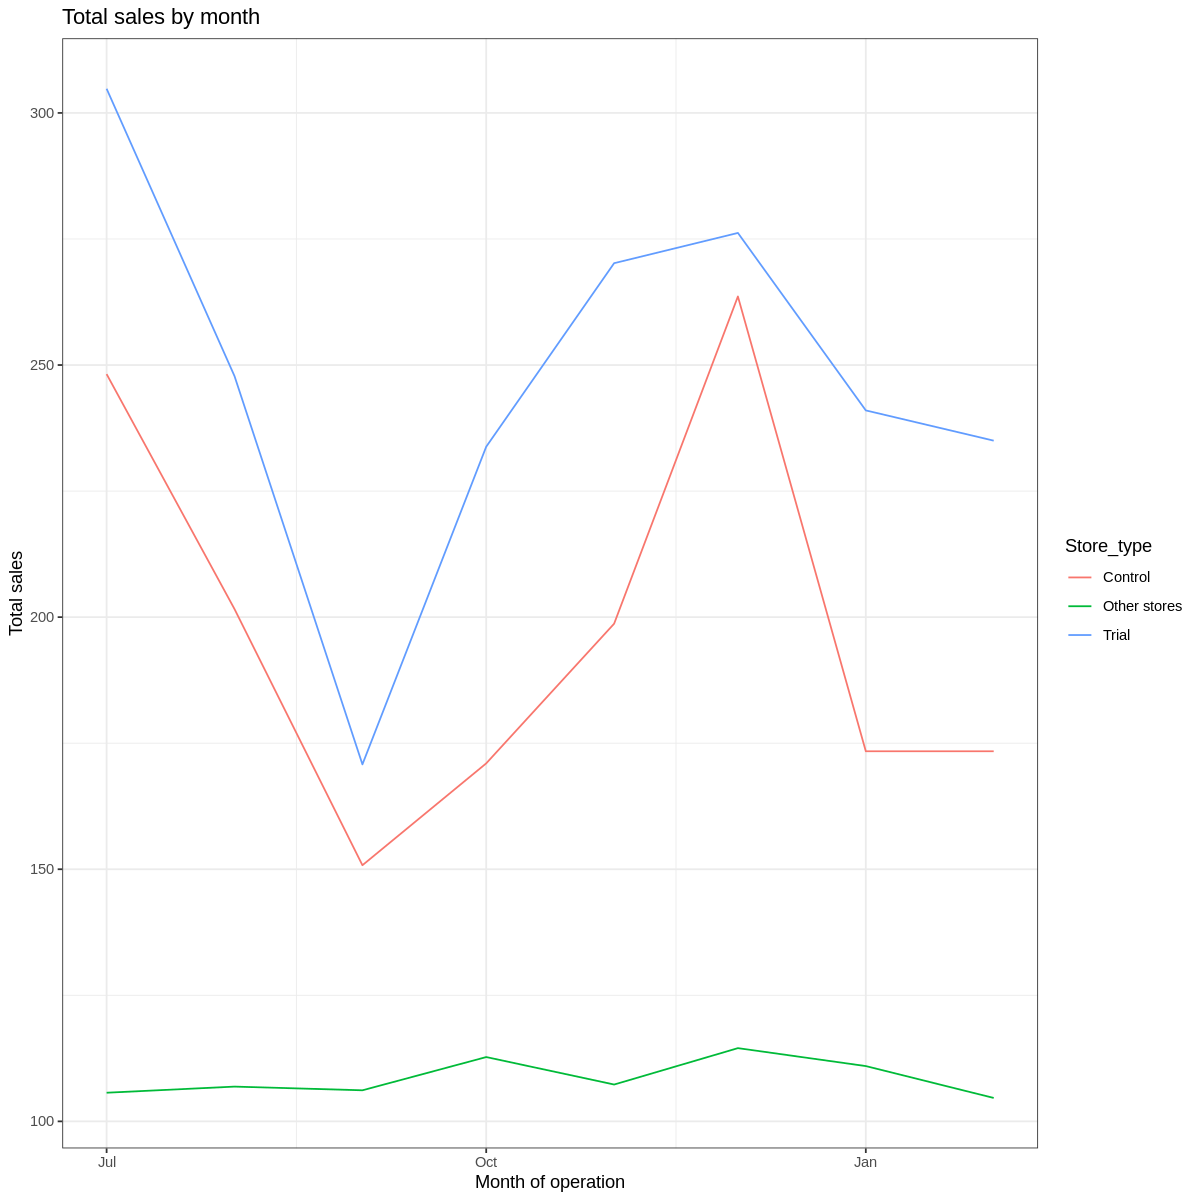

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeSales <- measureOverTime
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH","Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]
ggplot(pastSales, aes(TransactionMonth, totSales, color = Store_type)) +
geom_line() +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()


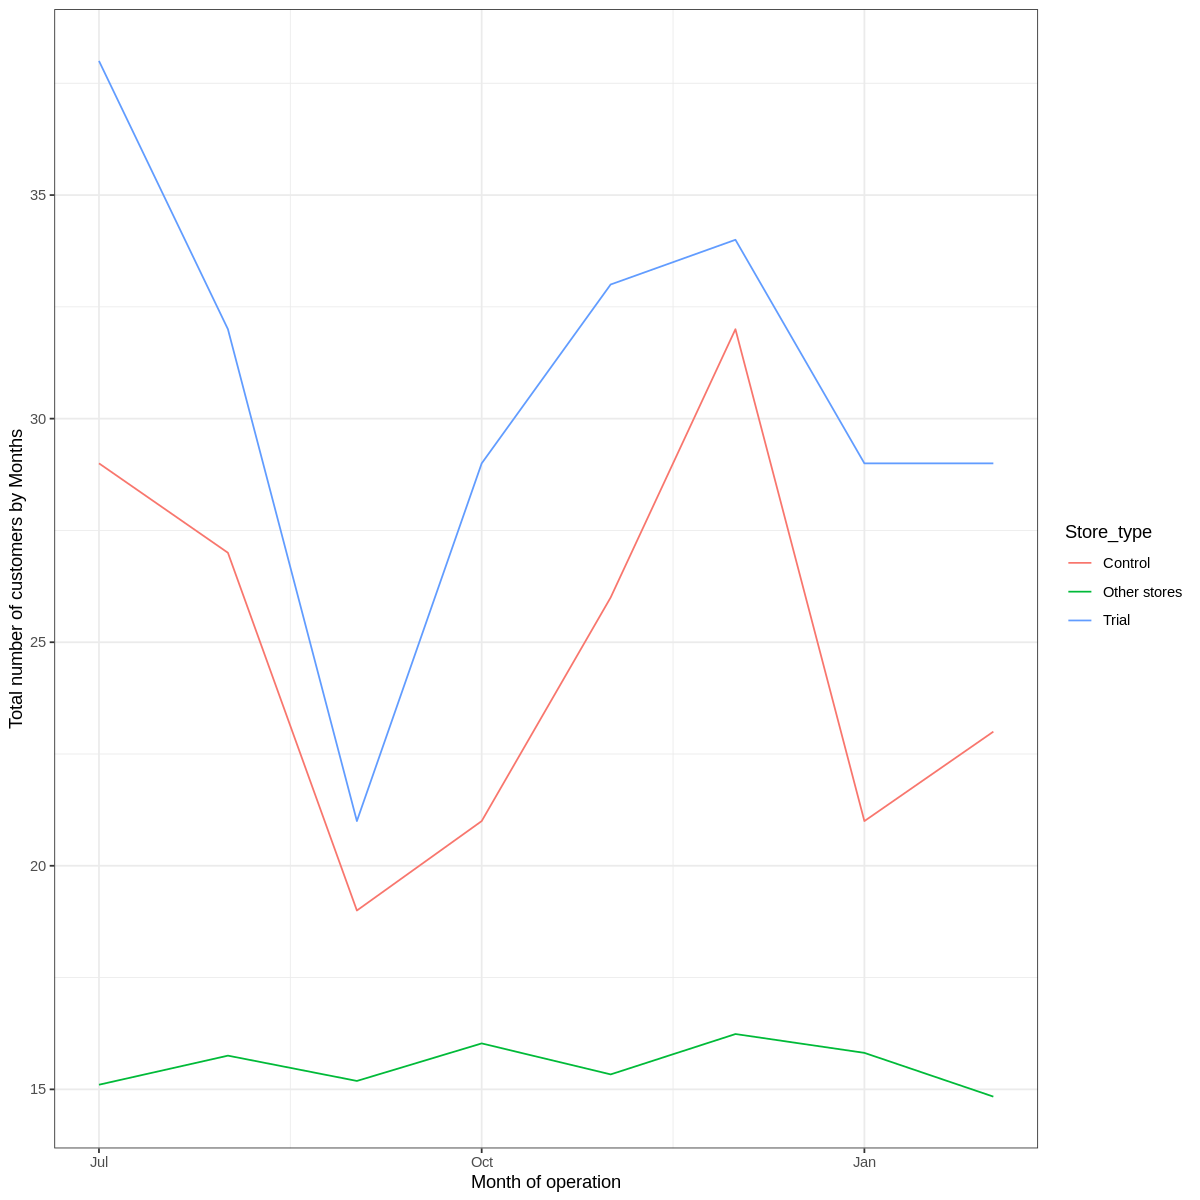

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeCusts <- measureOverTime
pastCustomers <- measureOverTimeCusts[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, numberCustomers := mean(nCustomers), by = c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]
ggplot(pastCustomers, aes(TransactionMonth, numberCustomers, color =Store_type)) +
geom_line() +
labs(x = "Month of operation", y = "Total number of customers by Months")+
theme_bw()

## Assessment of trial


The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.

We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period. 

In [ ]:
#### Scale pre‐trial control sales to match pre‐trial trial store sales
scalingFactorForControlSales <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(totSales)]/preTrialMeasures[STORE_NBR == control_store & YEARMONTH < 201902, sum(totSales)]

#### Apply the scaling factor
measureOverTimeSales <- measureOverTime
scaledControlSales <- measureOverTimeSales[STORE_NBR == control_store, ][ ,controlSales := totSales * scalingFactorForControlSales]


In [ ]:
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlSales[, c("YEARMONTH", "controlSales")],

measureOverTime[STORE_NBR == trial_store, c("totSales","YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff := abs(controlSales-totSales)/controlSales]


In [ ]:
# As our null hypothesis is that the trial period is the same as the
# pre‐trial period, let's take the standard deviation based on the scaled
# percentage difference in the pre‐trial period 
stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])
# note that there are 8 months in the pre‐trial period
# hence 8 ‐ 1 = 7 degrees of freedom

degreesOfFreedom <- 7

# We will test with a null hypothesis of there being 0 difference between trial
# and control stores
percentageDiff[, tValue := (percentageDiff - 0)/stdDev
][, TransactionMonth := as.Date(paste(YEARMONTH %/% 100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201905 & YEARMONTH > 201901, .(TransactionMonth, tValue)]



#### Find the 95th percentile of the t distribution with the appropriate
#### degrees of freedom to compare against
qt(0.95, df = degreesOfFreedom)

TransactionMonth,tValue
<date>,<dbl>
2019-02-01,0.7390413
2019-03-01,1.3199382
2019-04-01,0.4115993


[1] 1.894579

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.


Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.


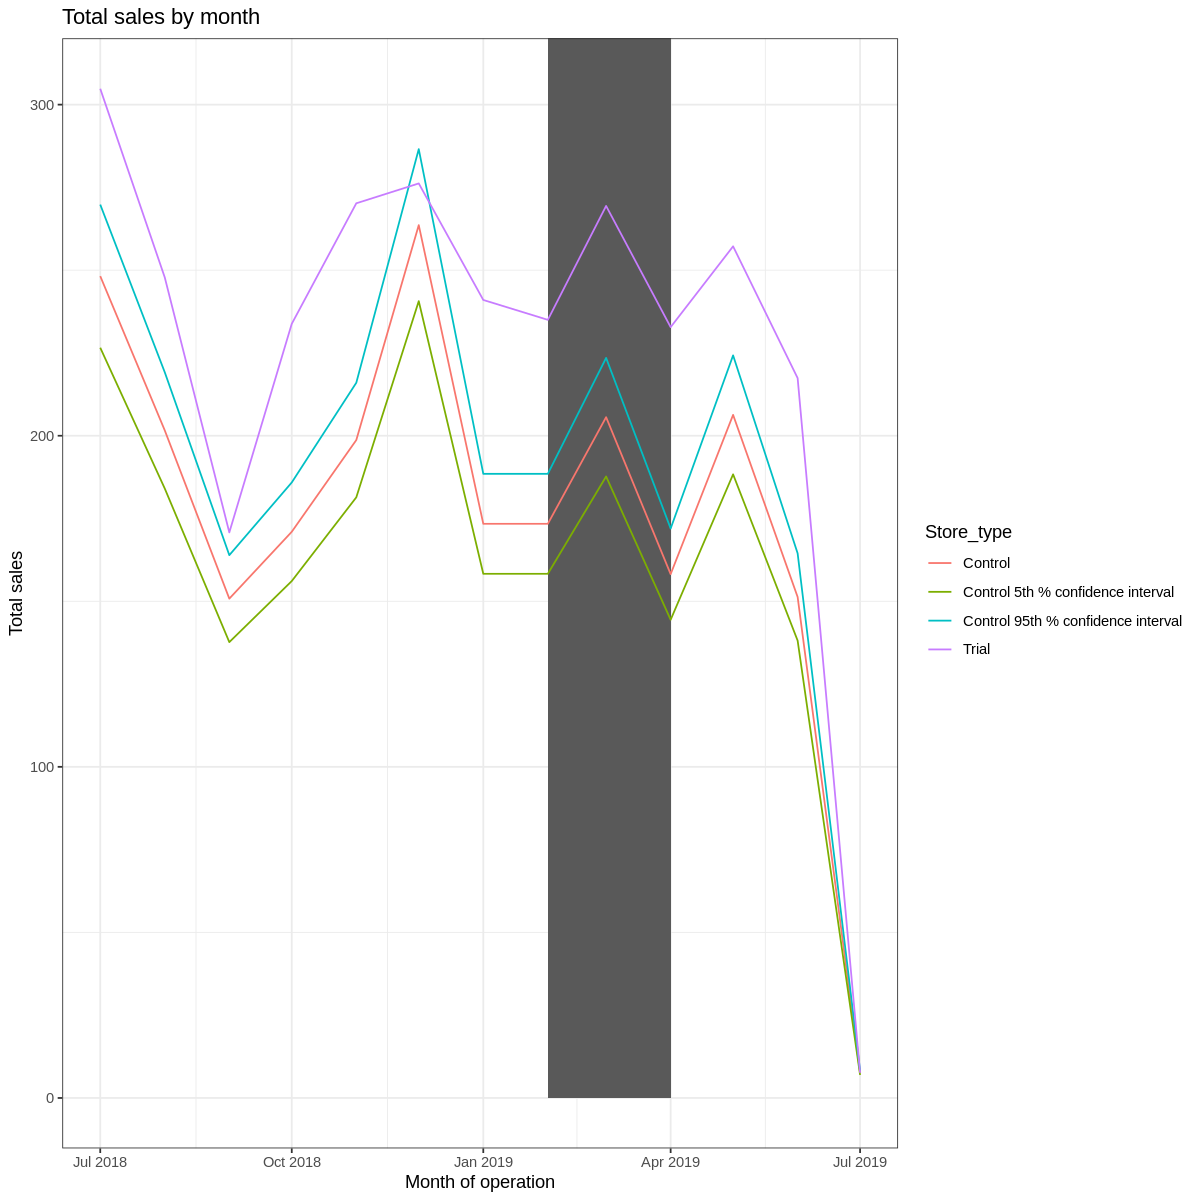

In [ ]:
measureOverTimeSales <- measureOverTime
#### Trial and control store total sales
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH","Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastSales_Controls95 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence interval"]
#### Control store 5th percentile
pastSales_Controls5 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastSales, pastSales_Controls95, pastSales_Controls5)
#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, totSales, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +
geom_line() +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.


Let's have a look at assessing this for number of customers as well.

In [ ]:
#### This would be a repeat of the steps before for total sales
#### Scale pre‐trial control customers to match pre‐trial trial store customers
scalingFactorForControlCust <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(nCustomers)]/preTrialMeasures[STORE_NBR ==
control_store & YEARMONTH < 201902, sum(nCustomers)]

#### Apply the scaling factor
measureOverTimeCusts <- measureOverTime
scaledControlCustomers <- measureOverTimeCusts[STORE_NBR == control_store,
][ , controlCustomers := nCustomers * scalingFactorForControlCust
][, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
]
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlCustomers[, c("YEARMONTH","controlCustomers")],

measureOverTimeCusts[STORE_NBR == trial_store, c("nCustomers", "YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff := abs(controlCustomers-nCustomers)/controlCustomers]


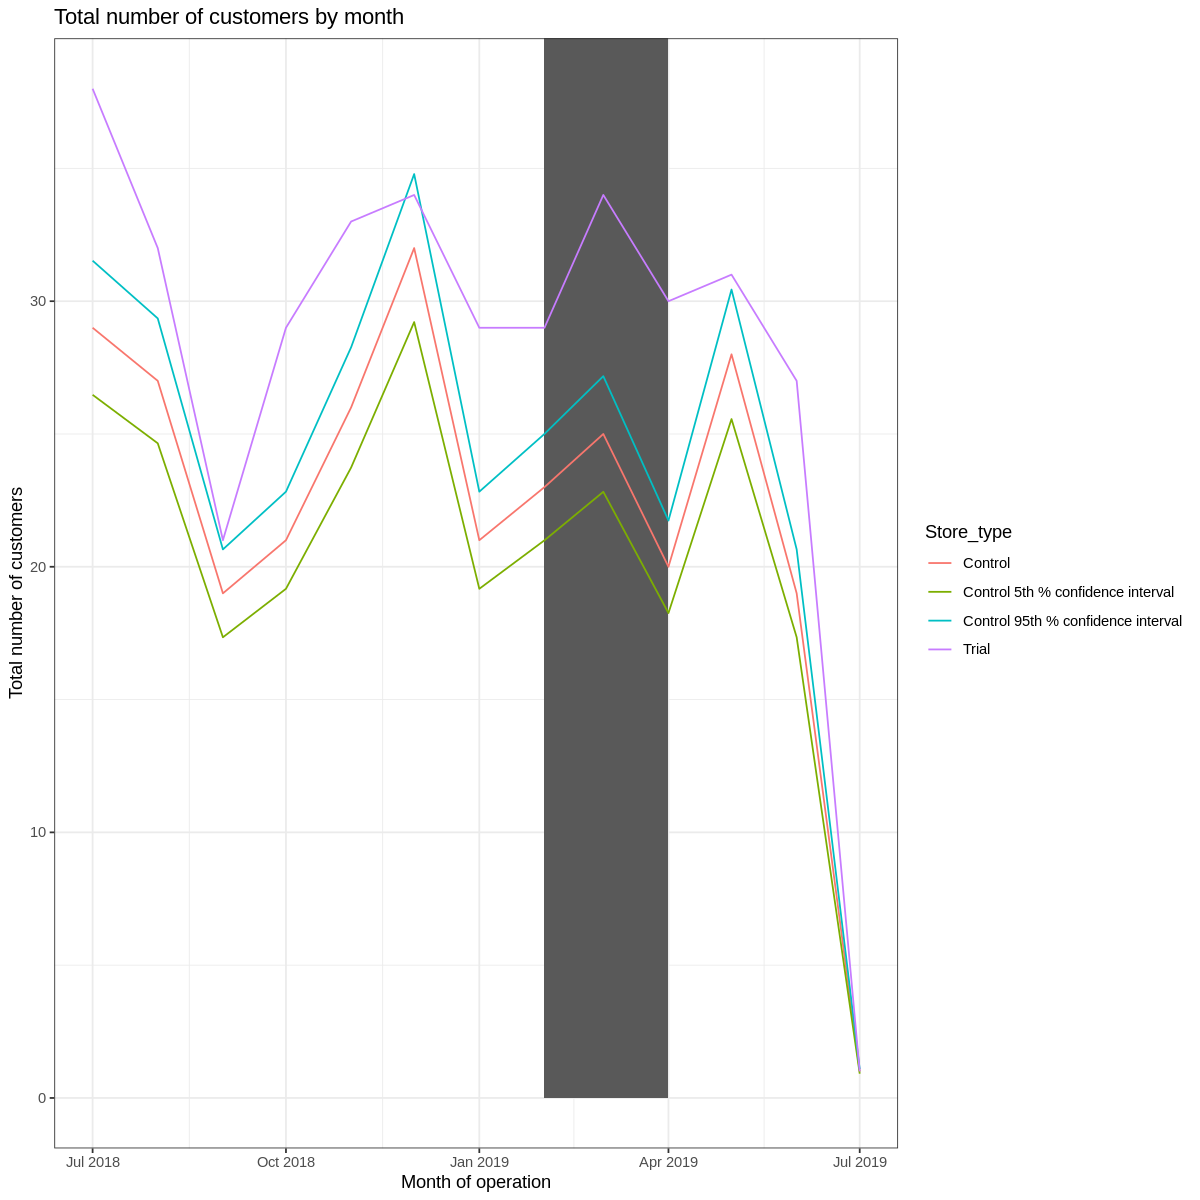

In [ ]:
#### As our null hypothesis is that the trial period is the same as the
# pre‐trial period, let's take the standard deviation based on the scaled
# percentage difference in the pre‐trial period

stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])
degreesOfFreedom <- 7
#### Trial and control store number of customers
pastCustomers <- measureOverTimeCusts[, nCusts := mean(nCustomers), by = c("YEARMONTH", "Store_type")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastCustomers_Controls95 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence interval"]
#### Control store 5th percentile
pastCustomers_Controls5 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5)
#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, nCusts, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +
geom_line() +
labs(x = "Month of operation", y = "Total number of customers", title = "Total number of customers by month")+
theme_bw()

Let's repeat finding the control store and assessing the impact of the trial for each of the other two trial stores. 

In [ ]:
measureOverTime <- data[, .(totSales = sum(TOT_SALES),
        nCustomers = uniqueN(LYLTY_CARD_NBR),
        nTxnPerCust = uniqueN(TXN_ID)/uniqueN(LYLTY_CARD_NBR),
        nChipsPerTxn = sum(PROD_QTY)/uniqueN(TXN_ID),
avgPricePerUnit = sum(TOT_SALES)/sum(PROD_QTY)
)
, by = c("STORE_NBR", "YEARMONTH")][order(STORE_NBR, YEARMONTH)]

In [ ]:
storesWithFullObs <- unique(measureOverTime[, .N, STORE_NBR][N == 13,
 STORE_NBR])
preTrialMeasures <- measureOverTime[YEARMONTH < 201902 & STORE_NBR %in%
 storesWithFullObs, ]

Use the functions we created earlier to calculate correlations and magnitude for each potential control store


## Trial No. 86

In [ ]:
trial_store <- 86
corr_nSales <- calculateCorrelation(preTrialMeasures, quote(totSales),trial_store)
corr_nCustomers <- calculateCorrelation(preTrialMeasures, quote(nCustomers), trial_store)
#### Use the functions for calculating magnitude
magnitude_nSales <- calculateMagnitudeDistance(preTrialMeasures, quote(totSales), trial_store)
magnitude_nCustomers <- calculateMagnitudeDistance(preTrialMeasures, quote(nCustomers), trial_store)

#### Create a combined score composed of correlation and magnitude
corr_weight <- 0.5
score_nSales <- merge(corr_nSales, magnitude_nSales, by = c("Store1","Store2"))[
  , scoreNSales := corr_measure * corr_weight + mag_measure * (1-corr_weight)]

score_nCustomers <- merge(corr_nCustomers, magnitude_nCustomers, by =
c("Store1", "Store2"))[, scoreNCust := corr_measure * corr_weight +
mag_measure * (1- corr_weight)]

#### Combine scores across the drivers
score_Control <- merge(score_nSales, score_nCustomers, by = c("Store1", "Store2"))
score_Control[, finalControlScore := scoreNSales * 0.5 + scoreNCust * 0.5]
#### Select control stores based on the highest matching store
#### (closest to 1 but not the store itself, i.e. the second ranked highest store)
#### Select control store for trial store 86
control_store <- score_Control[Store1 == trial_store,][order(-finalControlScore)][2, Store2]
control_store

[1] 152

Looks like store 155 will be a control store for trial store 86. Again, let's check visually if the drivers are indeed similar in the period before the trial.



We'll look at total sales first.

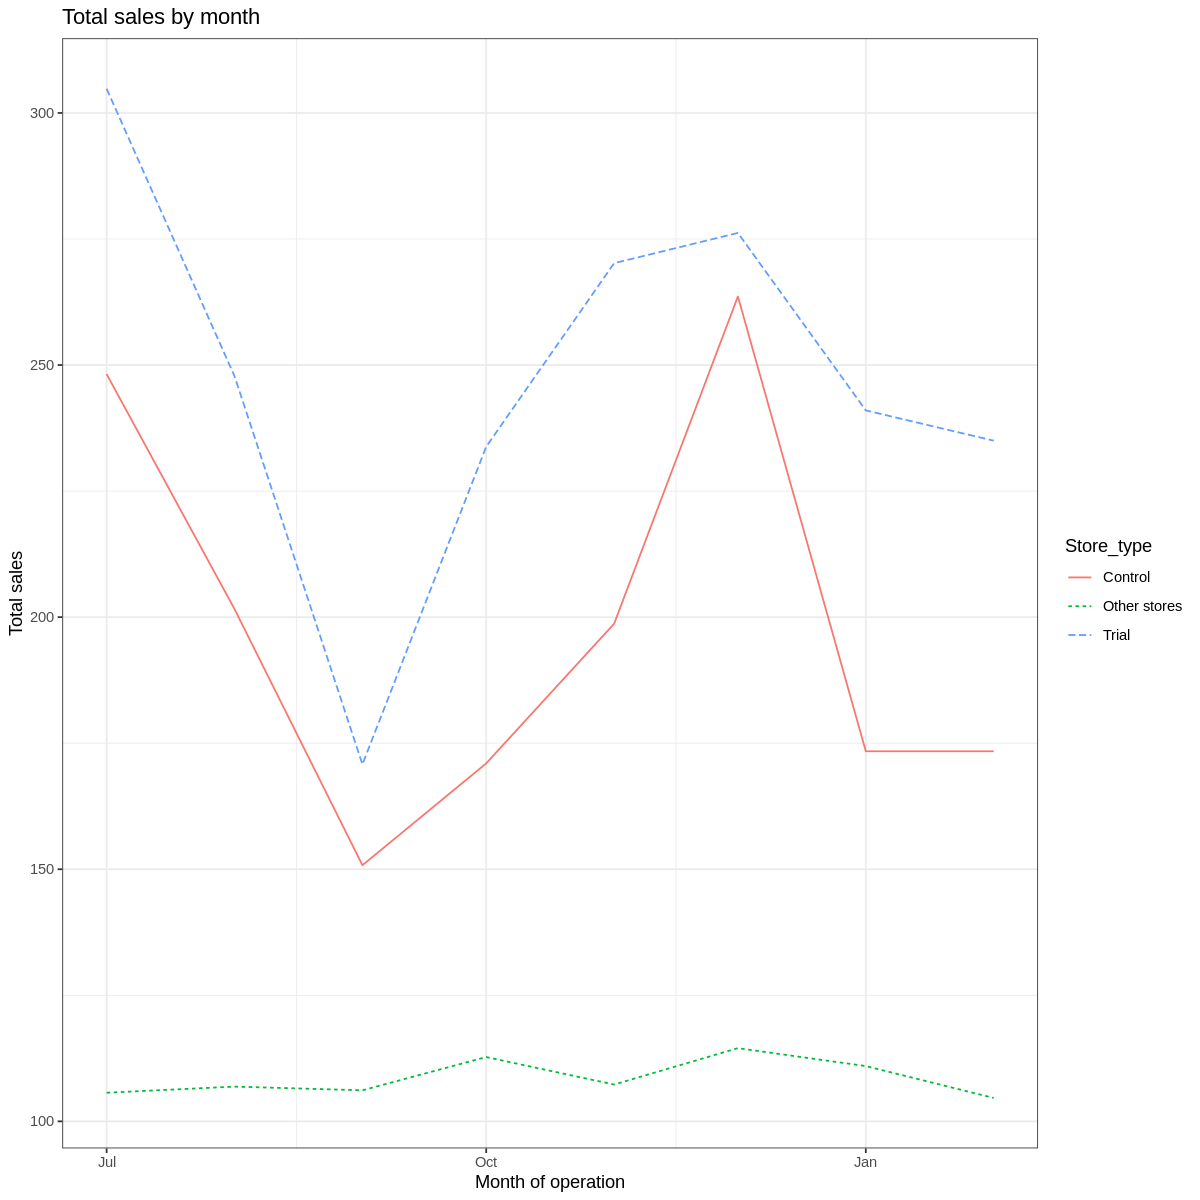

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeSales <- measureOverTime
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]


ggplot(pastSales, aes(TransactionMonth, totSales, color = Store_type)) +
geom_line(aes(linetype = Store_type)) +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()

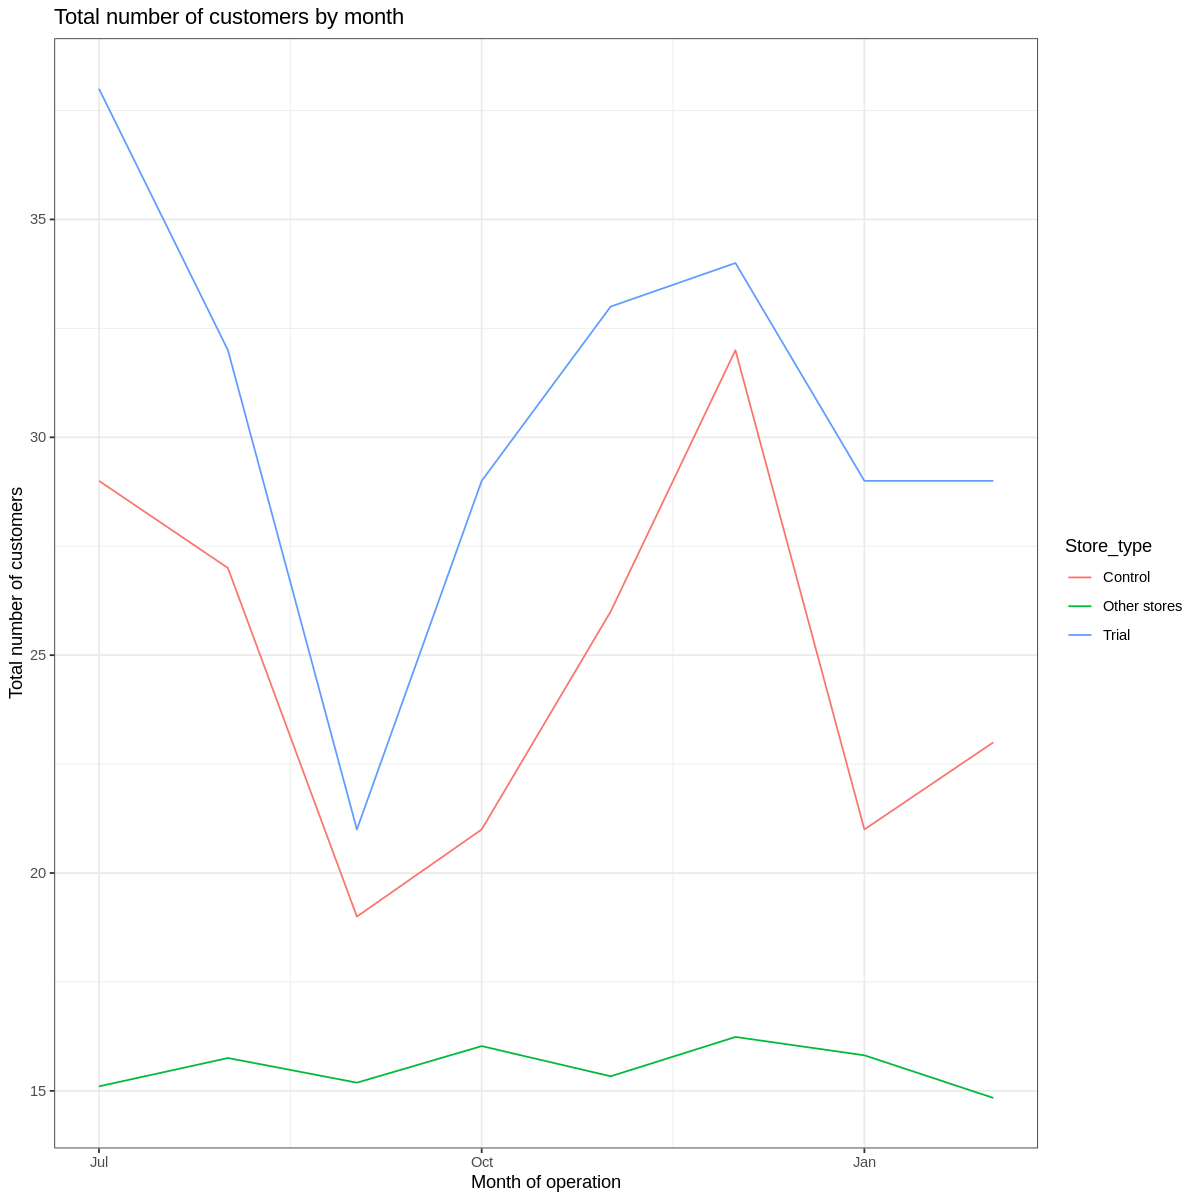

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeCusts <- measureOverTime
pastCustomers <- measureOverTimeCusts[, Store_type := ifelse(STORE_NBR ==trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, numberCustomers := mean(nCustomers), by =c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]


ggplot(pastCustomers, aes(TransactionMonth, numberCustomers, color =Store_type)) +
geom_line() +
labs(x = "Month of operation", y = "Total number of customers", title = "Total number of customers by month")+
theme_bw()


The trend in number of customers is also similar.

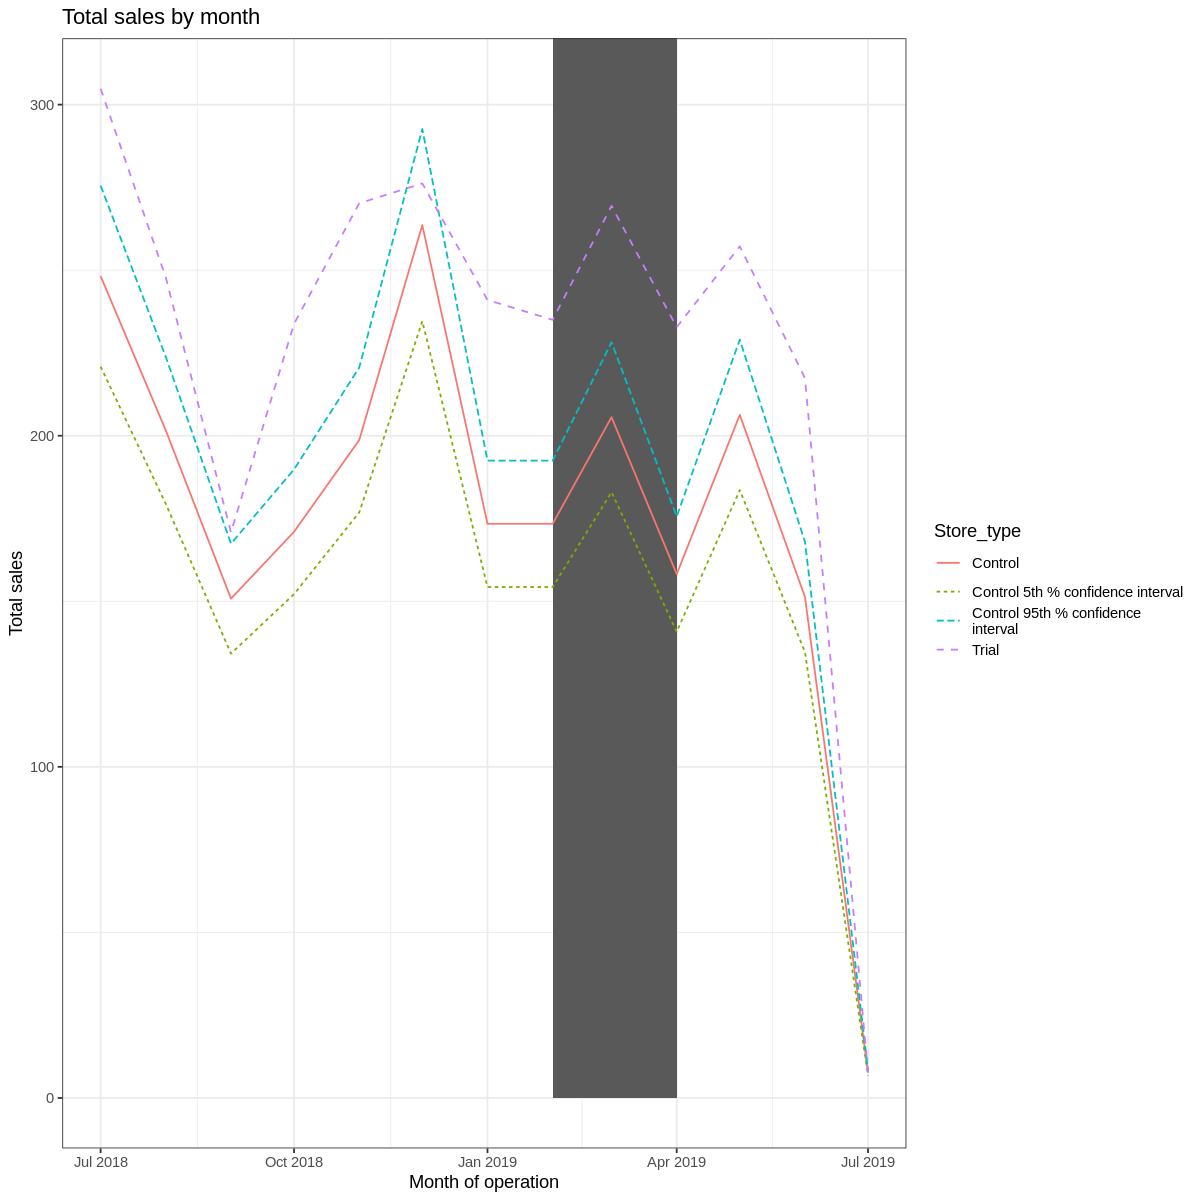

In [ ]:
#### Scale pre‐trial control sales to match pre‐trial trial store sales
scalingFactorForControlSales <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(totSales)]/preTrialMeasures[STORE_NBR ==control_store & YEARMONTH < 201902, sum(totSales)]


#### Apply the scaling factor
measureOverTimeSales <- measureOverTime
scaledControlSales <- measureOverTimeSales[STORE_NBR == control_store, ][ ,
controlSales := totSales * scalingFactorForControlSales]
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlSales[, c("YEARMONTH", "controlSales")],
measureOverTime[STORE_NBR == trial_store, c("totSales",
"YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff := abs(controlSales-totSales)/controlSales]
#### As our null hypothesis is that the trial period is the same as the
# pre‐trial period, let's take the standard deviation based on the scaled
# percentage difference in the pre‐trial period

stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])
degreesOfFreedom <- 7
#### Trial and control store total sales
measureOverTimeSales <- measureOverTime
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR ==
trial_store, "Trial",
ifelse(STORE_NBR == control_store,
"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH",
"Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%
100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastSales_Controls95 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence
interval"]
#### Control store 5th percentile
pastSales_Controls5 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastSales, pastSales_Controls95, pastSales_Controls5)

#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, totSales, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +


geom_line(aes(linetype = Store_type)) +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for the number of customers as well.

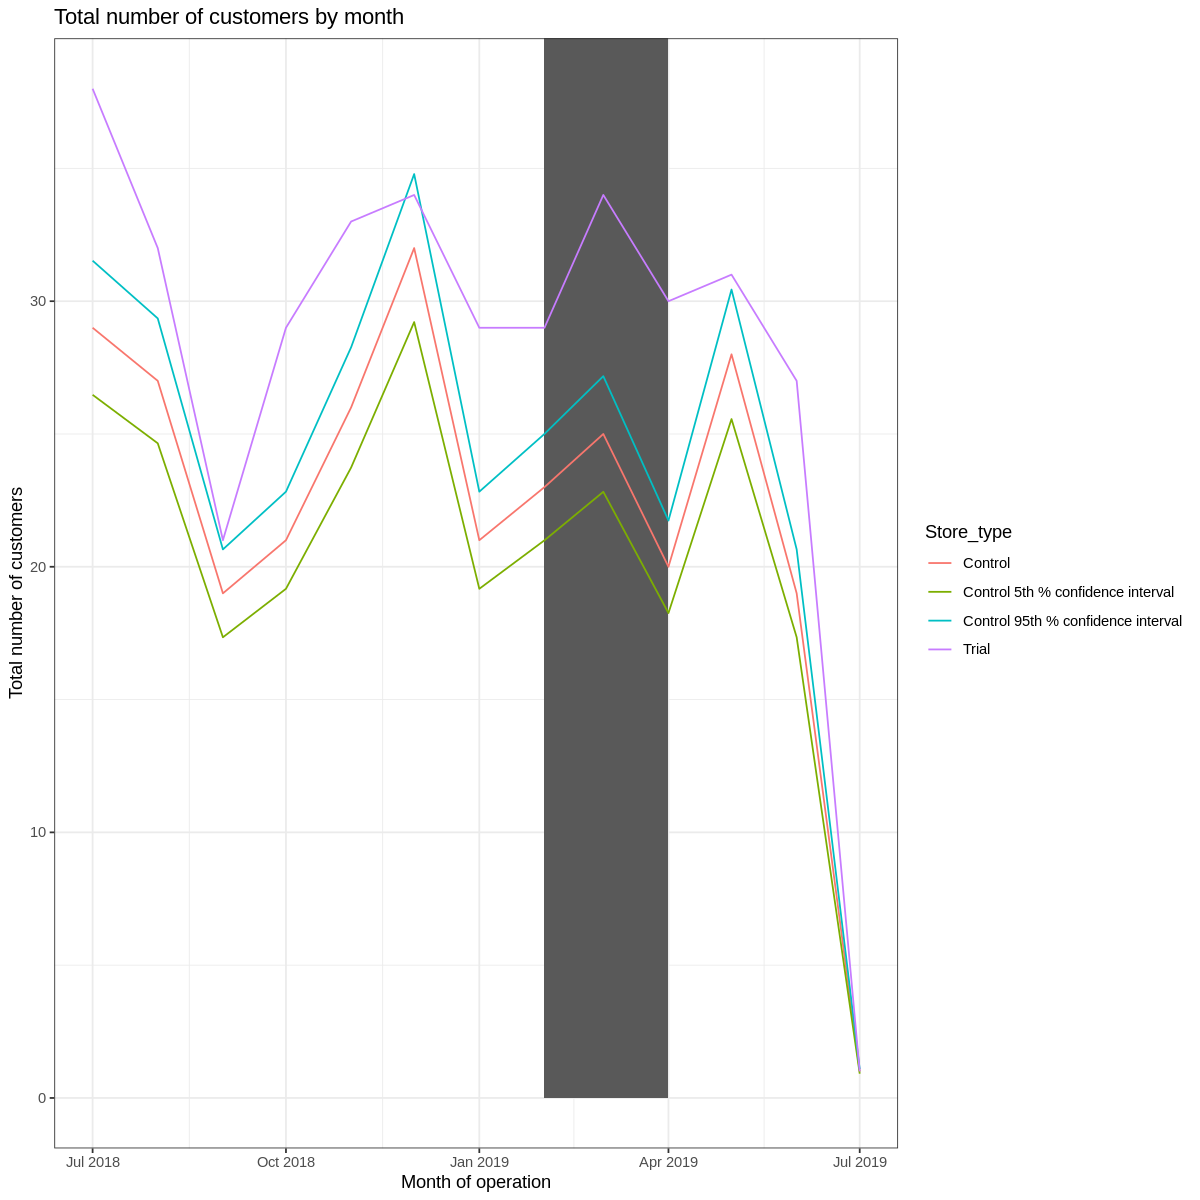

In [ ]:
#### This would be a repeat of the steps before for total sales
#### Scale pre‐trial control customers to match pre‐trial trial store customers
scalingFactorForControlCust <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(nCustomers)]/preTrialMeasures[STORE_NBR ==
control_store & YEARMONTH < 201902, sum(nCustomers)]

#### Apply the scaling factor
measureOverTimeCusts <- measureOverTime
scaledControlCustomers <- measureOverTimeCusts[STORE_NBR == control_store,
][ , controlCustomers := nCustomers* scalingFactorForControlCust
][, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
]
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlCustomers[, c("YEARMONTH","controlCustomers")],

measureOverTime[STORE_NBR == trial_store, c("nCustomers", "YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff :=abs(controlCustomers-nCustomers)/controlCustomers]
#### As our null hypothesis is that the trial period is the same as the
# pre‐trial period, let's take the standard deviation based on the scaled
# percentage difference in the pre‐trial period

stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])
degreesOfFreedom <- 7
#### Trial and control store number of customers
pastCustomers <- measureOverTimeCusts[, nCusts := mean(nCustomers), by =c("YEARMONTH", "Store_type")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastCustomers_Controls95 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence interval"]
#### Control store 5th percentile
pastCustomers_Controls5 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastCustomers, pastCustomers_Controls95,pastCustomers_Controls5)

#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, nCusts, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +

geom_line() +
labs(x = "Month of operation", y = "Total number of customers", title = "Total number of customers by month")+
theme_bw()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

## Trial store 88

In [ ]:
measureOverTime <- data[, .(totSales = sum(TOT_SALES),
nCustomers = uniqueN(LYLTY_CARD_NBR),
nTxnPerCust = uniqueN(TXN_ID)/uniqueN(LYLTY_CARD_NBR),
nChipsPerTxn = sum(PROD_QTY)/uniqueN(TXN_ID),
avgPricePerUnit = sum(TOT_SALES)/sum(PROD_QTY)
)
, by = c("STORE_NBR", "YEARMONTH")][order(STORE_NBR,YEARMONTH)]
#### Use the functions for calculating correlation
trial_store <- 88
corr_nSales <- calculateCorrelation(preTrialMeasures, quote(totSales),
trial_store)
corr_nCustomers <- calculateCorrelation(preTrialMeasures, quote(nCustomers),
trial_store)

#### Use the functions for calculating magnitude
magnitude_nSales <- calculateMagnitudeDistance(preTrialMeasures,quote(totSales), trial_store)
magnitude_nCustomers <- calculateMagnitudeDistance(preTrialMeasures,quote(nCustomers), trial_store)

#### Create a combined score composed of correlation and magnitude
corr_weight <- 0.5
score_nSales <- merge(corr_nSales, magnitude_nSales, by = c("Store1",
"Store2"))[, scoreNSales := corr_measure * corr_weight + mag_measure * (1-
corr_weight)]

score_nCustomers <- merge(corr_nCustomers, magnitude_nCustomers, by =
c("Store1", "Store2"))[, scoreNCust := corr_measure * corr_weight +
mag_measure * (1- corr_weight)]

#### Combine scores across the drivers
score_Control <- merge(score_nSales, score_nCustomers, by = c("Store1","Store2"))
score_Control[, finalControlScore := scoreNSales * 0.5 + scoreNCust * 0.5]
#### Select control stores based on the highest matching store
#### (closest to 1 but not the store itself, i.e. the second ranked highest store)
#### Select control store for trial store 88
control_store <- score_Control[Store1 == trial_store,
][order(-finalControlScore)][2, Store2]
control_store

[1] 250

We've now found store 250 to be a suitable control store for trial store 88.

Again, let's check visually if the drivers are indeed similar in the period before the trial.

We'll look at total sales first.

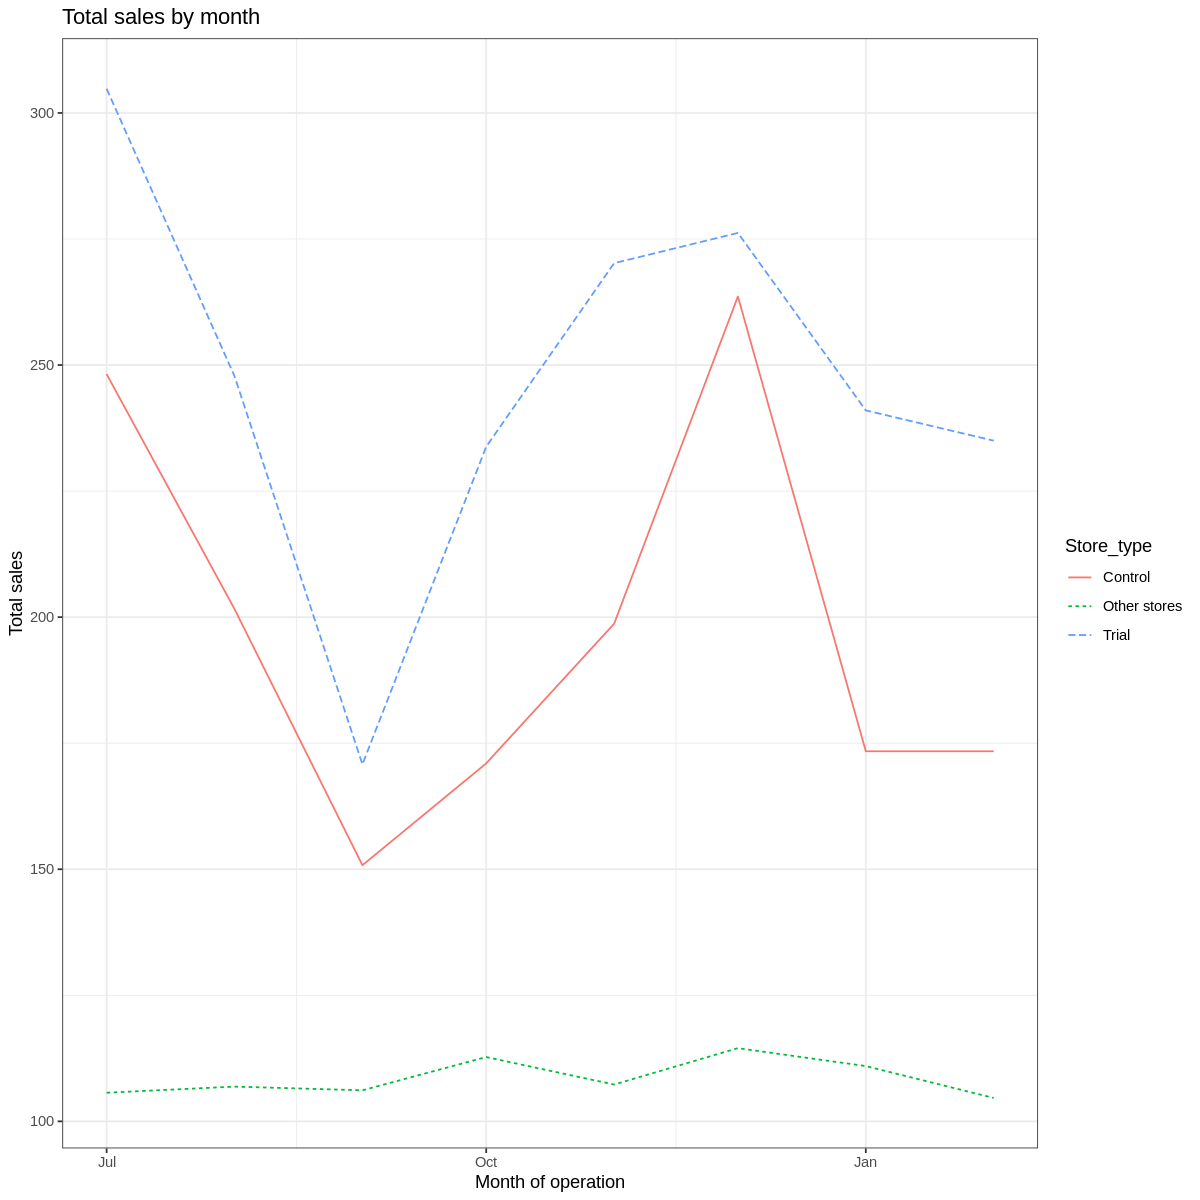

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeSales <- measureOverTime
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR ==trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/% 100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]

ggplot(pastSales, aes(TransactionMonth, totSales, color = Store_type)) +
geom_line(aes(linetype = Store_type)) +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()

Great, the trial and control stores have similar total sales.

Next, number of customers.

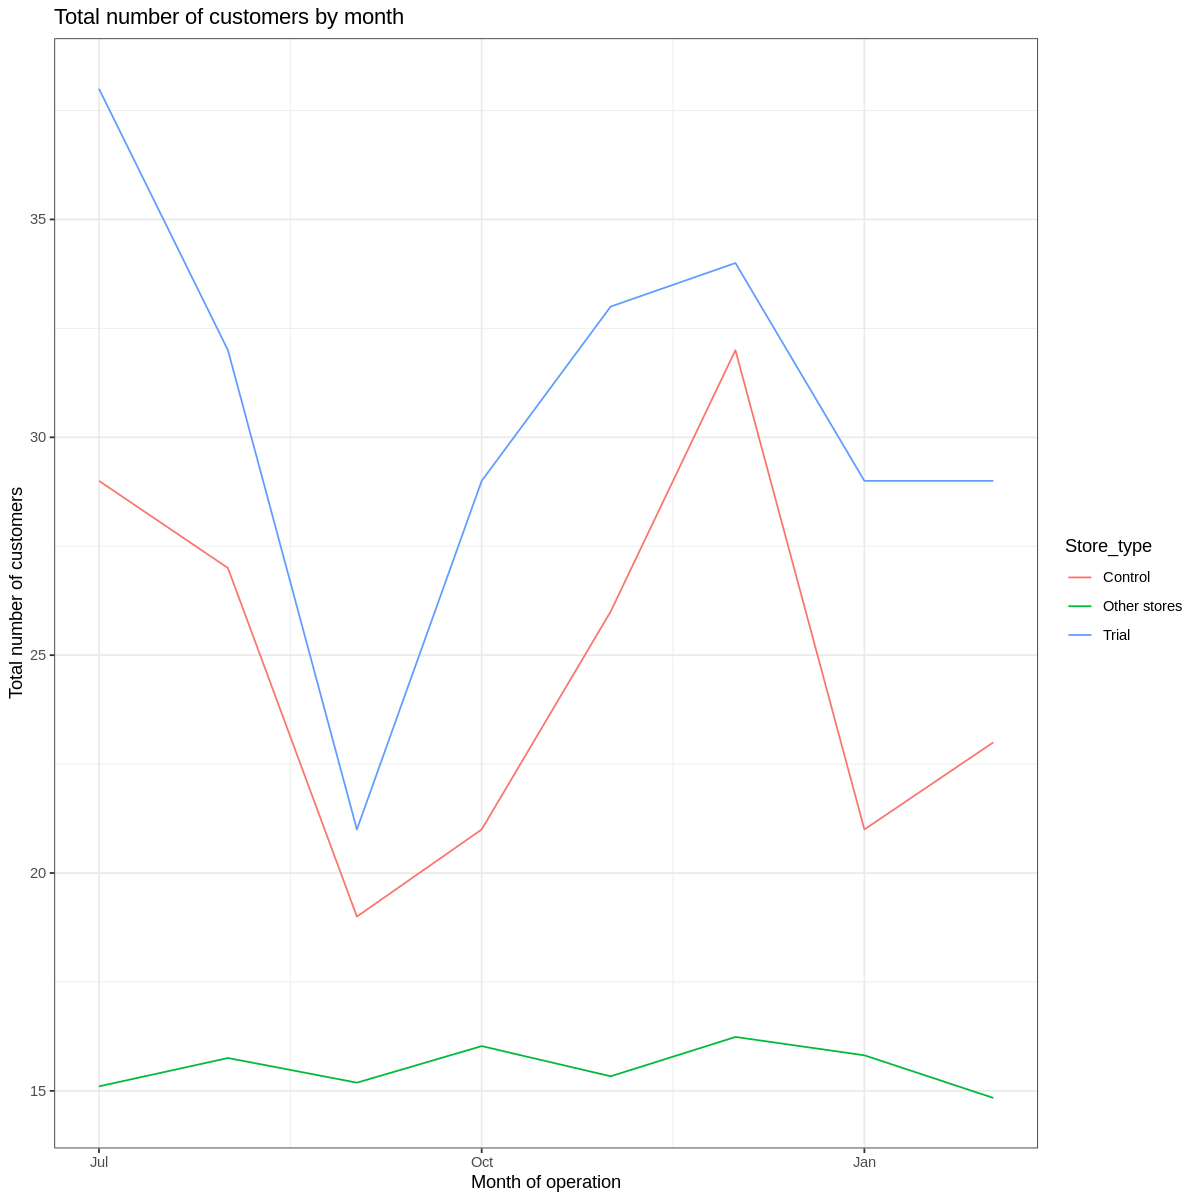

In [ ]:
#### Visual checks on trends based on the drivers
measureOverTimeCusts <- measureOverTime
pastCustomers <- measureOverTimeCusts[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, numberCustomers := mean(nCustomers), by =c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][YEARMONTH < 201903 , ]
ggplot(pastCustomers, aes(TransactionMonth, numberCustomers, color =Store_type)) +
geom_line() +
labs(x = "Month of operation", y = "Total number of customers", title = "Total number of customers by month")+
theme_bw()


Total number of customers of the control and trial stores are also similar.


Let's now assess the impact of the trial on sales.


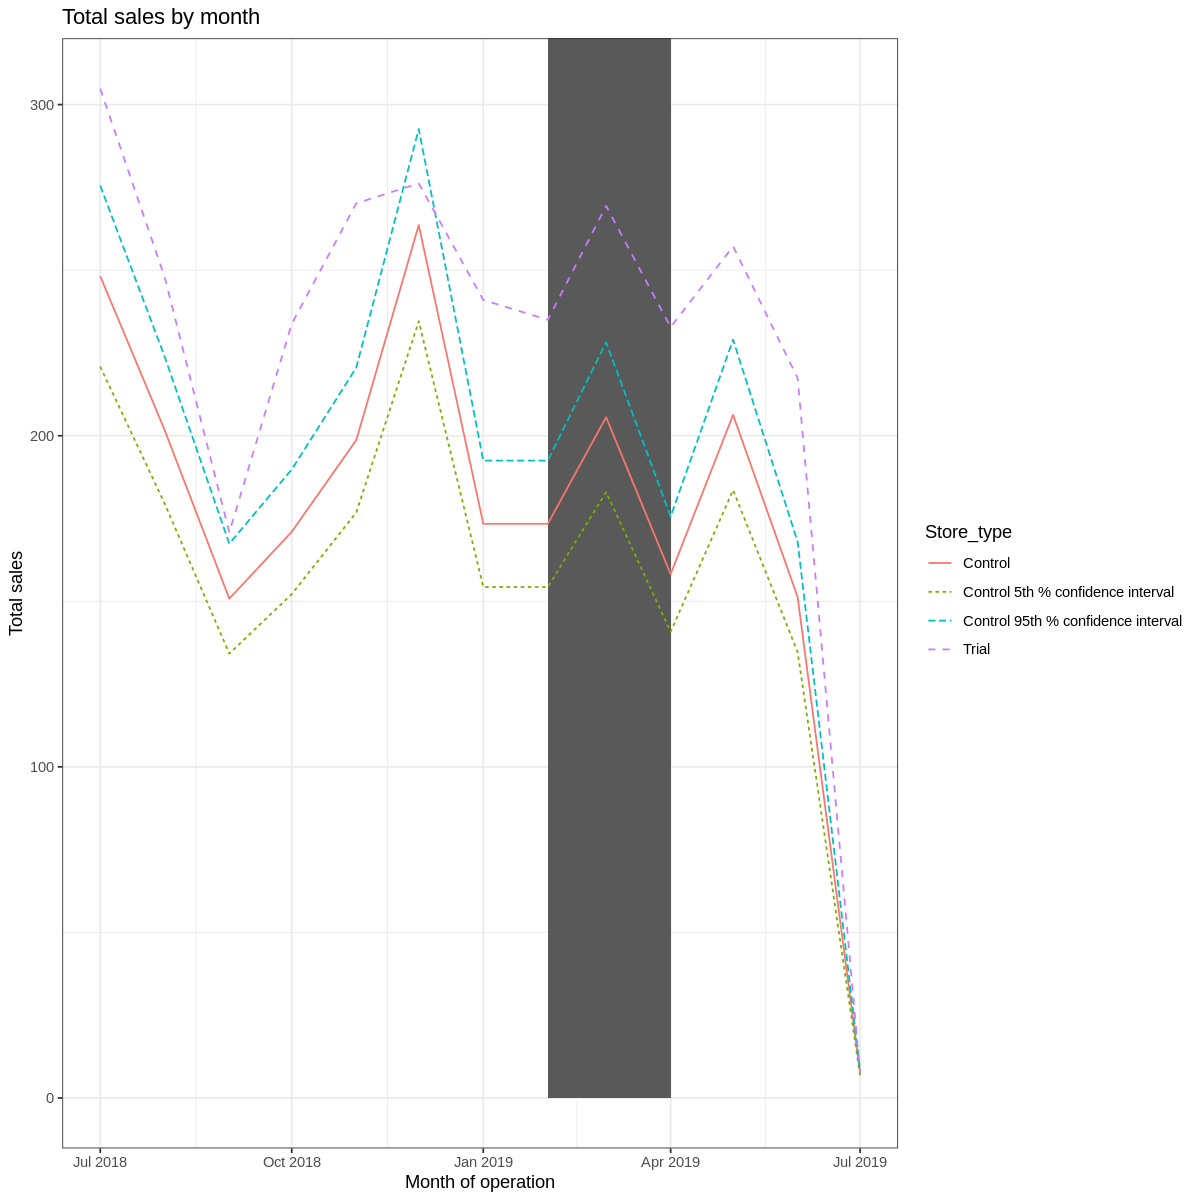

In [ ]:
#### Scale pre‐trial control sales to match pre‐trial trial store sales
scalingFactorForControlSales <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(totSales)]/preTrialMeasures[STORE_NBR ==
control_store & YEARMONTH < 201902, sum(totSales)]


#### Apply the scaling factor
measureOverTimeSales <- measureOverTime
scaledControlSales <- measureOverTimeSales[STORE_NBR == control_store, ][ ,
controlSales := totSales * scalingFactorForControlSales]
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlSales[, c("YEARMONTH", "controlSales")],
measureOverTime[STORE_NBR == trial_store, c("totSales",
"YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff :=abs(controlSales-totSales)/controlSales]
#### As our null hypothesis is that the trial period is the same as the
# pre‐trial period, let's take the standard deviation based on the scaled
# percentage difference in the pre‐trial period


stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])

degreesOfFreedom <- 7
#### Trial and control store total sales
measureOverTimeSales <- measureOverTime
pastSales <- measureOverTimeSales[, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store,"Control", "Other stores"))
][, totSales := mean(totSales), by = c("YEARMONTH", "Store_type")
][, TransactionMonth := as.Date(paste(YEARMONTH %/%100, YEARMONTH %% 100, 1, sep = "‐"), "%Y‐%m‐%d")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastSales_Controls95 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence interval"]
#### Control store 5th percentile
pastSales_Controls5 <- pastSales[Store_type == "Control",
][, totSales := totSales * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastSales, pastSales_Controls95, pastSales_Controls5)

#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, totSales, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +


geom_line(aes(linetype = Store_type)) +
labs(x = "Month of operation", y = "Total sales", title = "Total sales by month")+
theme_bw()

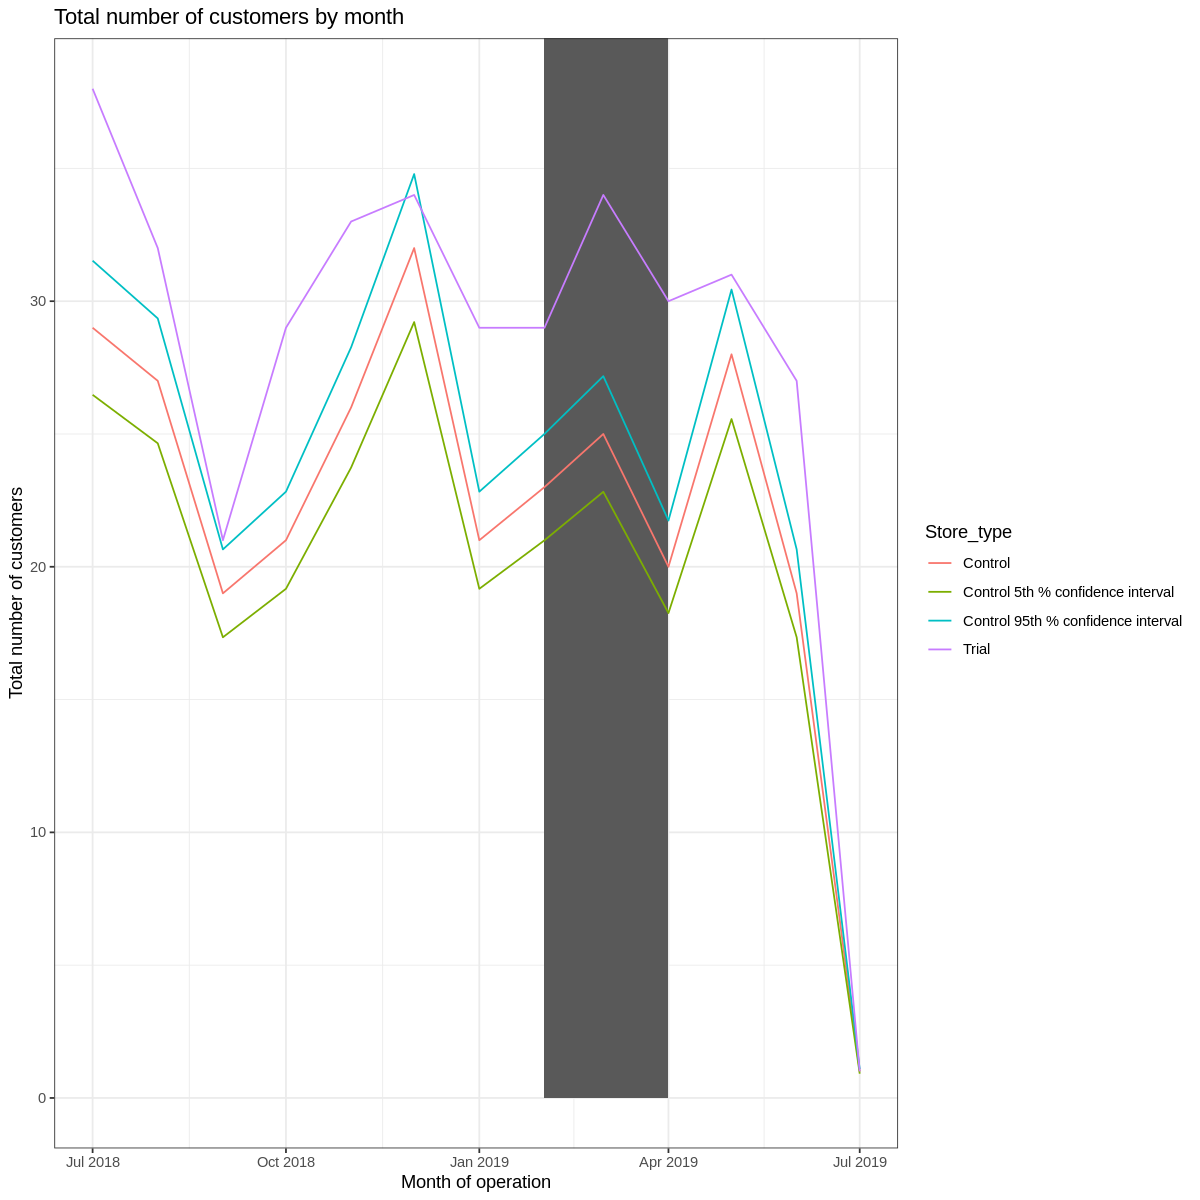

In [ ]:
#### This would be a repeat of the steps before for total sales
#### Scale pre‐trial control customers to match pre‐trial trial store customers
scalingFactorForControlCust <- preTrialMeasures[STORE_NBR == trial_store &
YEARMONTH < 201902, sum(nCustomers)]/preTrialMeasures[STORE_NBR ==
control_store & YEARMONTH < 201902, sum(nCustomers)]


#### Apply the scaling factor
measureOverTimeCusts <- measureOverTime
scaledControlCustomers <- measureOverTimeCusts[STORE_NBR == control_store,
][ , controlCustomers := nCustomers * scalingFactorForControlCust
][, Store_type := ifelse(STORE_NBR == trial_store, "Trial",
ifelse(STORE_NBR == control_store, "Control", "Other stores"))
]
#### Calculate the percentage difference between scaled control sales and trial sales
percentageDiff <- merge(scaledControlCustomers[, c("YEARMONTH", "controlCustomers")],

measureOverTime[STORE_NBR == trial_store,c("nCustomers", "YEARMONTH")],
by = "YEARMONTH"
)[, percentageDiff :=abs(controlCustomers-nCustomers)/controlCustomers]
#### As our null hypothesis is that the trial period is the same as the
#### pre‐trial period, let's take the standard deviation based on the scaled
#### percentage difference in the pre‐trial period


stdDev <- sd(percentageDiff[YEARMONTH < 201902 , percentageDiff])
degreesOfFreedom <- 7 # there are 8 months in the pre‐trial period hence 8 ‐ 1 = 7 degrees of freedom
#### Trial and control store number of customers
pastCustomers <- measureOverTimeCusts[, nCusts := mean(nCustomers), by = c("YEARMONTH", "Store_type")
][Store_type %in% c("Trial", "Control"), ]
#### Control store 95th percentile
pastCustomers_Controls95 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 + stdDev * 2)
][, Store_type := "Control 95th % confidence interval"]
#### Control store 5th percentile
pastCustomers_Controls5 <- pastCustomers[Store_type == "Control",
][, nCusts := nCusts * (1 - stdDev * 2)
][, Store_type := "Control 5th % confidence interval"]
trialAssessment <- rbind(pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5)
#### Plotting these in one nice graph
ggplot(trialAssessment, aes(TransactionMonth, nCusts, color = Store_type)) +
geom_rect(data = trialAssessment[ YEARMONTH < 201905 & YEARMONTH > 201901 ,],
aes(xmin = min(TransactionMonth), xmax = max(TransactionMonth), ymin = 0 ,
ymax = Inf, color = NULL), show.legend = FALSE) +


geom_line() +
labs(x = "Month of operation", y = "Total number of customers", title = "Total number of customers by month")+
theme_bw()


Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.